In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [3]:
def funcLineaire(x,a):
    return a*x


In [4]:
def funcAffine(x,a,b):
    return a*x+b

In [17]:
def r_carre(xdata,ydata,residuals):
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata-np.mean(ydata))**2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

Modélisation par une fonction linéaire a*x
a=6.70745095e-07
r^2 =0.971850058
eccart-type de la pente=2.26730547e-08

Modélisation par une fonction affine a*x+b
a=6.38099114e-07
b=0.00072539368
r^2 =0.975116738
eccart-type de la pente=5.09663442e-08
eccart-type de l'ordonnée à l'origine=0.00100102348


Text(0.5, 1.0, 'Regression Lineaire')

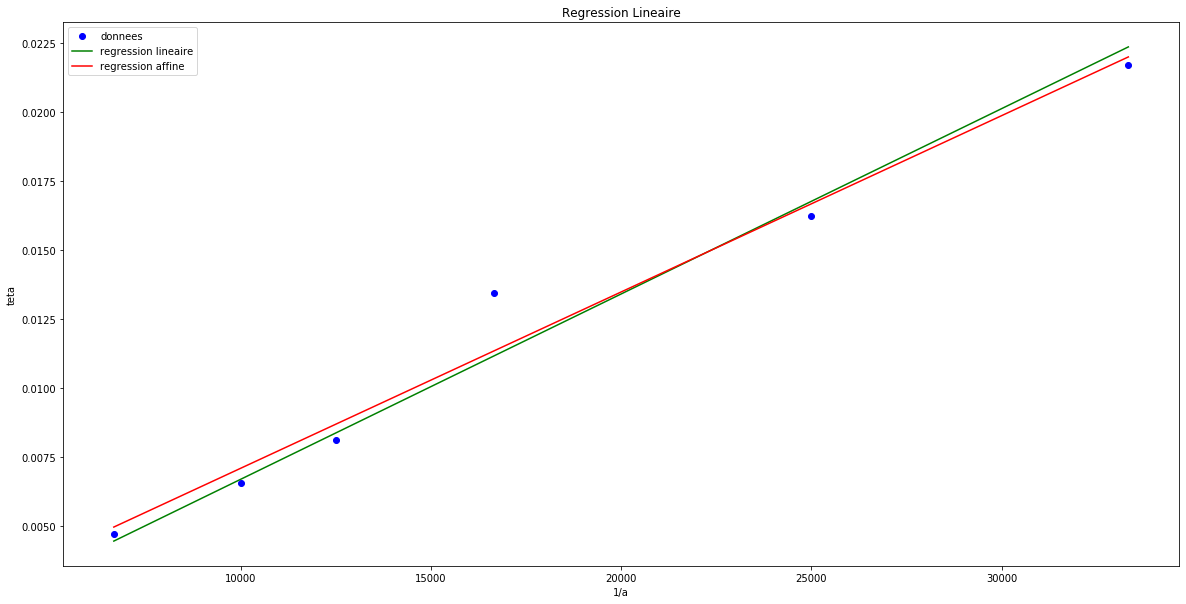

In [29]:
#Données 
unsura=np.array([33333.3333333333,25000,16666.6666666667,12500,10000,6666.66666666667])
teta=np.array([0.02170703,0.01624335,0.01343768,0.00812168,0.00658594,0.00472534])

#modélisation par une function lineaire a*x
popt, pcov = curve_fit(funcLineaire, unsura, teta)
perr = np.sqrt(np.diag(pcov))
residuals = teta- funcLineaire(unsura, popt[0])
r_squared = r_carre(unsura,teta,residuals)

print("Modélisation par une fonction linéaire a*x")
print("a={:8.9}\nr^2 ={:8.9}\neccart-type de la pente={:8.9}\n".format(popt[0],r_squared,perr[0]))

#modélisation par une function affine a*x+b
popt2, pcov2 = curve_fit(funcAffine, unsura, teta)
perr2 = np.sqrt(np.diag(pcov2))
residuals2 = teta- funcAffine(unsura, popt2[0],popt2[1])
r_squared2 = r_carre(unsura,teta,residuals2)

print("Modélisation par une fonction affine a*x+b")
print("a={:8.9}\nb={:8.9}\nr^2 ={:8.9}\neccart-type de la pente={:8.9}\neccart-type de l'ordonnée à l'origine={:8.9}".format(popt2[0],popt2[1],r_squared2,perr2[0],perr2[1]))
# Graphique
plt.figure(figsize=(20,10)) 
plt.plot(unsura,teta,"bo",label="donnees")
plt.plot( # droite de regression lineaire
    unsura,popt[0] * unsura ,"g-",label="regression lineaire") 
plt.plot( # droite de regression affine
    unsura,popt2[0] * unsura + popt2[1],"r-",label="regression affine")    
plt.xlabel("1/a") # nom de l'axe x
plt.ylabel("teta") # nom de l'axe y
plt.legend() # la legende
plt.title("Regression Lineaire") # titre de graphique